In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,hinge_loss

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names
target_names = data.target_names

print("Feature Names:", feature_names)
print("Target Names:", target_names)
print("Shape of Features:", X.shape)
print("Shape of Target:", y.shape)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
Shape of Features: (569, 30)
Shape of Target: (569,)


Convert data in numpy array to Pandas dataframe for EDA

In [5]:
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


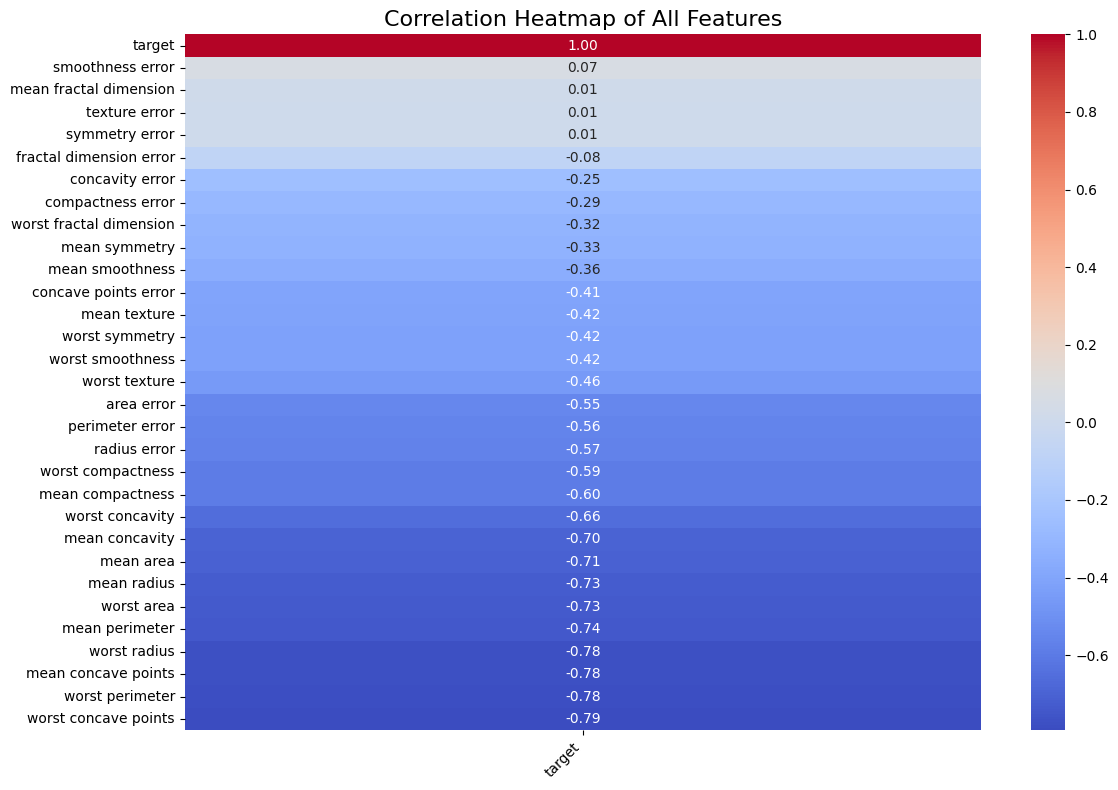

In [7]:
# Calculate correlation of all features with each other
correlation = df.corr()['target'].sort_values(ascending=False)

# Plotting the entire correlation matrix
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Rotate labels for better readability
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate column labels
plt.yticks(rotation=0)  # Keep row labels horizontal
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()

In [8]:
# Keep features with |correlation| ≥ 0.1
features_to_keep = correlation[correlation.abs() >= 0.1].index
df = df[features_to_keep]
print("Features retained based on correlation with target:", features_to_keep)

Features retained based on correlation with target: Index(['target', 'concavity error', 'compactness error',
       'worst fractal dimension', 'mean symmetry', 'mean smoothness',
       'concave points error', 'mean texture', 'worst symmetry',
       'worst smoothness', 'worst texture', 'area error', 'perimeter error',
       'radius error', 'worst compactness', 'mean compactness',
       'worst concavity', 'mean concavity', 'mean area', 'mean radius',
       'worst area', 'mean perimeter', 'worst radius', 'mean concave points',
       'worst perimeter', 'worst concave points'],
      dtype='object')


In [9]:
skewness = df.skew()
print(skewness)


target                    -0.528461
concavity error            5.110463
compactness error          1.902221
worst fractal dimension    1.662579
mean symmetry              0.725609
mean smoothness            0.456324
concave points error       1.444678
mean texture               0.650450
worst symmetry             1.433928
worst smoothness           0.415426
worst texture              0.498321
area error                 5.447186
perimeter error            3.443615
radius error               3.088612
worst compactness          1.473555
mean compactness           1.190123
worst concavity            1.150237
mean concavity             1.401180
mean area                  1.645732
mean radius                0.942380
worst area                 1.859373
mean perimeter             0.990650
worst radius               1.103115
mean concave points        1.171180
worst perimeter            1.128164
worst concave points       0.492616
dtype: float64


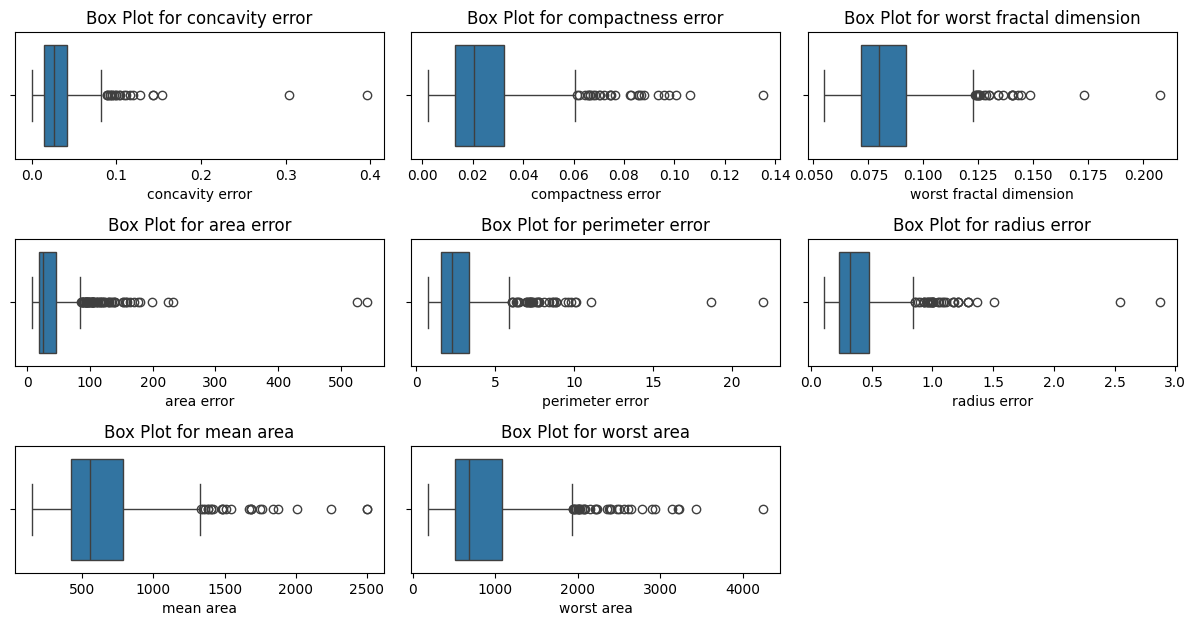

In [10]:
highly_skewed_features = skewness[(skewness > 1.5) | (skewness < -1.5)].index
plt.figure(figsize=(12, 8))
for i, feature in enumerate(highly_skewed_features, 1):
    plt.subplot(4, 3, i)  # Adjust this based on the number of features
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot for {feature}')
plt.tight_layout()
plt.show()

Making copy of data to apply operation on Outliers

In [11]:
df_log = df.copy()

for feature in highly_skewed_features:
    df_log[feature] = np.log1p(df_log[feature])  # log(1 + x) to handle zeros

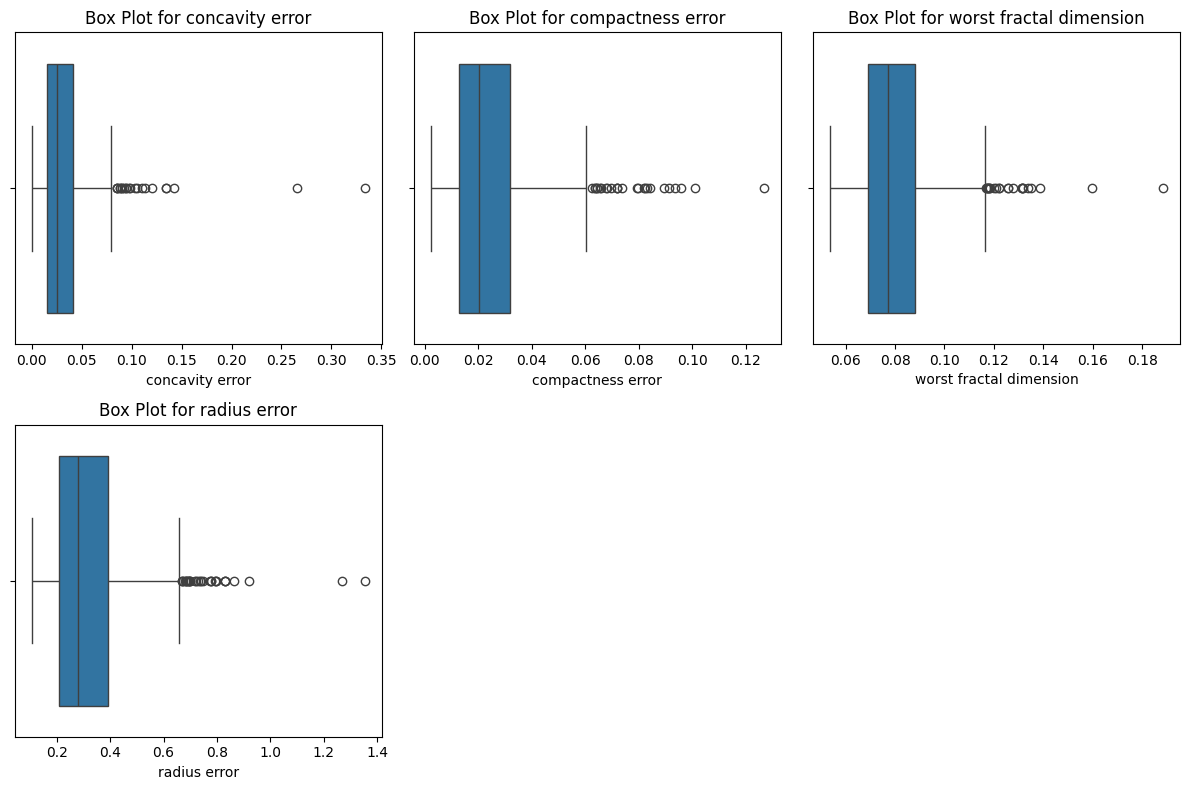

In [12]:
skewness_log = df_log.skew()
highly_skewed_features_log = skewness_log[(skewness_log > 1.5) | (skewness_log < -1.5)].index
plt.figure(figsize=(12, 8))
for i, feature in enumerate(highly_skewed_features_log, 1):
    plt.subplot(2, 3, i)  # Adjust this based on the number of features
    sns.boxplot(x=df_log[feature])
    plt.title(f'Box Plot for {feature}')
plt.tight_layout()
plt.show()

In [13]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply scaling to the log-transformed data
df_scaled = pd.DataFrame(scaler.fit_transform(df_log), columns=df_log.columns)

# Verify the results
print(df_scaled.describe())


           target  concavity error  compactness error  \
count  569.000000       569.000000         569.000000   
mean     0.627417         0.092933           0.182470   
std      0.483918         0.082356           0.137810   
min      0.000000         0.000000           0.000000   
25%      0.000000         0.044894           0.086148   
50%      1.000000         0.076618           0.144259   
75%      1.000000         0.123467           0.237985   
max      1.000000         1.000000           1.000000   

       worst fractal dimension  mean symmetry  mean smoothness  \
count               569.000000     569.000000       569.000000   
mean                  0.199247       0.379605         0.394785   
std                   0.121852       0.138456         0.126967   
min                   0.000000       0.000000         0.000000   
25%                   0.114419       0.282323         0.304595   
50%                   0.173511       0.369697         0.390358   
75%                   0.

In [14]:
final_X = df_scaled.drop(columns=['target'])
final_Y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(final_X, final_Y, test_size=0.2)

In [15]:
# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Iterate through the dictionary to train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    cls = classification_report(y_pred, y_test)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    print(f'Classification report: \n{cls}')
    print("-"*50)

Logistic Regression: Accuracy = 0.96
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        39
         1.0       1.00      0.95      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

--------------------------------------------------
Random Forest: Accuracy = 0.94
Classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92        40
         1.0       0.97      0.93      0.95        74

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

--------------------------------------------------
Support Vector Machine: Accuracy = 0.98
Classification report: 
              precision    recall  f1-score   support

         

SVM is choosed because of high recall for 0 class

In [16]:
svm = models["Support Vector Machine"]

# Get decision function values
decision_function = svm.decision_function(X_test)

# Compute hinge loss
loss = hinge_loss(y_test, decision_function)
print("Hinge Loss:", loss)

Hinge Loss: 0.08724441720968251


In [19]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels_list = {}

for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    pred = svc.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, pred)  # Calculate accuracy
    decision_function = svc.decision_function(X_test)
    loss = hinge_loss(y_test, decision_function)
    cls = classification_report(pred, y_test)
    print(f'{kernel}: Accuracy = {accuracy:.2f}')
    print("Hinge Loss:", loss)
    print(f'Classification report: \n{cls}')
    print("-"*50)

    kernels_list[kernel] = loss



linear: Accuracy = 0.98
Hinge Loss: 0.09376295787963683
Classification report: 
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        41
         1.0       1.00      0.97      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

--------------------------------------------------
poly: Accuracy = 0.99
Hinge Loss: 0.05775401926253873
Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        42
         1.0       1.00      0.99      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

--------------------------------------------------
rbf: Accuracy = 0.98
Hinge Loss: 0.08724441720968251
Classification report: 
         

Polynomial kernel is best

Lets check does it overfitting or not

In [20]:
# Fit the model to the training data
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)

# Predict on both training and test sets
train_pred = svc_poly.predict(X_train)
test_pred = svc_poly.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

print("\nClassification Report (Training Set):")
print(classification_report(y_train, train_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_pred))


Training Accuracy: 0.99
Testing Accuracy: 0.99

Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       169
         1.0       0.99      1.00      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        43
         1.0       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Polynomial kernel is not overfitting 